### Introduction

In this project, we will predict the outcome of a weight by using the height variable and also the outcome of a height by using the weight variable.

### 1 -  Reading and understanding data

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# Read html file
df = pd.read_html('http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html',header=0, index_col='Index')[0]

In [3]:
# Display the 5 first rows
df.head()

,Height(Inches),Weight(Pounds)
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 1 to 25000
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Height(Inches)  25000 non-null  float64
 1   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2)
memory usage: 585.9 KB


We have only two variables in this dataset : Height and Weight. However we have 25000 non-null rows.

In [5]:
df.describe()

,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


The values in the dataset seem to be consistent.

### 2- Visualizing the data

**Weight vs Height**

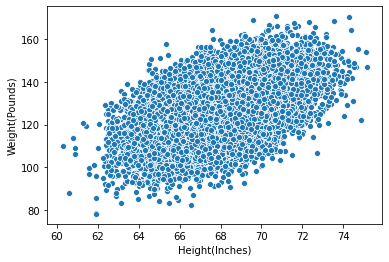

In [6]:
# Display a scatterplot
sns.scatterplot(data=df,x='Height(Inches)',y='Weight(Pounds)')

**Height vs Weight**

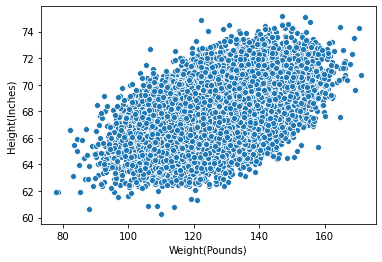

In [7]:
# Display a scatterplot
sns.scatterplot(data=df,x='Weight(Pounds)',y='Height(Inches)')

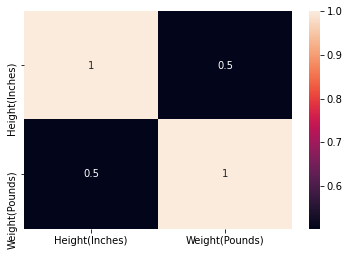

In [8]:
# Visualizing the correlation using a heatmap
sns.heatmap(df.corr(), annot=True)

There is a pretty high correlation between the weight and the height. 

### 3 - Using Simple Linear Regression

### Predicting the weight with the height variable

In [9]:
# Import LinearRegression
X1 = np.array(list(df['Height(Inches)'])).reshape((-1, 1))
y1 = df['Weight(Pounds)']

# Splitting the variables as training and testing
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

# Build a linear regression model
regr1 = LinearRegression()

# Fit regr to the dataset
regr1.fit(X1_train,y1_train)

# Get estimated intercept and coefficient values 
print('Intercept :',regr1.intercept_)
print('Slope :',regr1.coef_[0])

Intercept : -81.73686228241552
Slope : 3.071245009225645


In [10]:
# let's use an example of an height of 65''
X1_predict = np.array(65).reshape((-1, 1))
y1_predict = regr1.predict(X1_predict)
print('The predicted weight for 65 inches is %.2f lbs' % y1_predict[0])

The predicted weight for 65 inches is 117.89 lbs


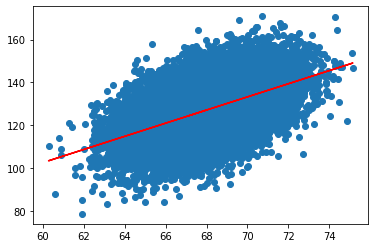

In [11]:
# Visualizing the regression line
plt.scatter(X1_train, y1_train)
plt.plot(X1_train, regr1.intercept_ + regr1.coef_[0]*X1_train, 'r')
plt.show()

In [12]:
# Making Predictions of y_value
y1_train_pred = regr1.predict(X1_train)
y1_test_pred = regr1.predict(X1_test)

# Comparing the r2 value of both train and test data
print('R2 Score for train set :',r2_score(y1_train,y1_train_pred))
print('R2 Score for test set :',r2_score(y1_test,y1_test_pred))

R2 Score for train set : 0.2508830163228676
R2 Score for test set : 0.26059113512888576


In [13]:
# Calculate the mean squared error
print('The mean squared error is',mean_squared_error(y1_test, y1_test_pred))

The mean squared error is 102.48790963792533


The R2 scores we found are pretty low. Therefore we can't conclude that the model is viable.

### Predicting the height with the weight variable

In [14]:
# Import LinearRegression
X2 = np.array(list(df['Weight(Pounds)'])).reshape((-1, 1))
y2 = df['Height(Inches)']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, 
                                                    test_size = 0.2, random_state = 42)
# Build a linear regression model
regr2 = LinearRegression()

# Fit regr to the dataset
regr2.fit(X2_train,y2_train)

# Get estimated intercept and coefficient values 
print('Intercept :',regr2.intercept_)
print('Slope :',regr2.coef_[0])

Intercept : 57.60962063175937
Slope : 0.0816877245446864


In [15]:
# let's use an example of an weight of 110lbs
X2_predict = np.array(110).reshape((-1, 1))
y2_predict = regr2.predict(X2_predict)
y2_predict[0]

66.59527033167487

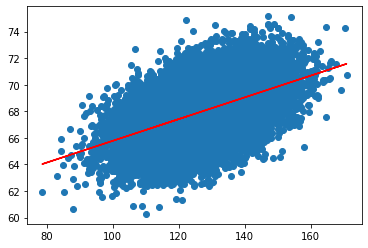

In [16]:
# Visualizing the regression line
plt.scatter(X2_train, y2_train)
plt.plot(X2_train, regr2.intercept_ + regr2.coef_[0]*X2_train, 'r')
plt.show()

In [17]:
# Making Predictions of y_value
y2_train_pred = regr2.predict(X2_train)
y2_test_pred = regr2.predict(X2_test)

# Comparing the r2 value of both train and test data
print('R2 Score for train set :',r2_score(y2_train,y2_train_pred))
print('R2 Score for test set :',r2_score(y2_test,y2_test_pred))

R2 Score for train set : 0.2508830163228677
R2 Score for test set : 0.26055631630450127


In [18]:
# Calculate the mean squared error
print('The mean squared error is',mean_squared_error(y2_test, y2_test_pred))

The mean squared error is 2.724962846065037


Like the case "Predicting the weight with the height variable", the R2 scores we found are pretty low. Therefore we can't conclude that the model is viable. To improve the relevance of the model, we might need to add some variables such as the age, the weekly number of hours in physical exercise or the daily quantity (in calories) of food eaten.